In [1]:
import pandas as pd
import numpy as np

In [3]:
from tensorflow import keras

In [4]:
# This will load the mnist dataset from the keras.

(x_train,y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(y_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0].shape

(28, 28)

In [10]:
import matplotlib.pyplot as plt

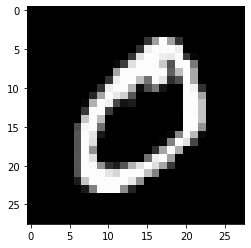

In [15]:
plt.imshow(x_train[1], cmap='gray')

In [16]:
y_train[1]

0

In [17]:
# We also need to normalize the whole dataset so make it more suitable for the training of the model.

x_train = x_train/255 
x_test = x_test/255

In [19]:
x_train.shape

(60000, 28, 28)

In [21]:
x_test.shape

(10000, 28, 28)

In [27]:
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

In [28]:
x_test_flatten.shape

(10000, 784)

### BASIC STRUCTURE OF THE NEURON :

1. From the one side it will take the input value and apply the regression formula to get the result.
2. Then the result is given to the activation function and here I have used sigmoid as the activation function and the derived result from the activation function is the final result.


In [41]:
#The creates a simple sequence or stack of the neurons.
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid') #This is the first layer where I have used 784 no. of input neurons and on the output side I have used only 10 neurons.
])



model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flatten,y_train, epochs=6) # here epochs is the no. of the iterations of the training.

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4654 - accuracy: 0.8786
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9215
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9235
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9261
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2620 - accuracy: 0.9273


In [32]:
model.evaluate(x_test_flatten,y_test) # this will evalute and gives the loss and accuracy of the model.

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9248


[0.268436074256897, 0.9247999787330627]

In [35]:

predicted_values = model.predict(x_test_flatten)

313/313 [==============================] - 1s 2ms/step


In [36]:
predicted_values[0]

array([2.3482587e-02, 1.1927824e-07, 4.6719462e-02, 9.5984834e-01,
       1.5314966e-03, 1.0752000e-01, 5.4499208e-07, 9.9982774e-01,
       6.6419475e-02, 6.4027762e-01], dtype=float32)

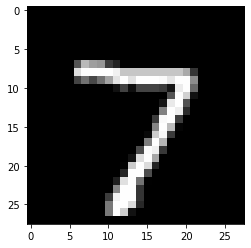

In [42]:
plt.imshow(x_test[0], cmap='gray')

In [39]:
# np.argmax will take an array and returns the index of the max element present in the array.
np.argmax(predicted_values[0])

7